<a href="https://colab.research.google.com/github/choi-yh/BOJ/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84/4963_%EC%84%AC%EC%9D%98_%EA%B0%9C%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 10.07
https://www.acmicpc.net/problem/4963

문제
---
정사각형으로 이루어져 있는 섬과 바다 지도가 주어진다. 섬의 개수를 세는 프로그램을 작성하시오.

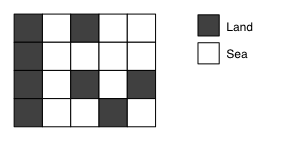

한 정사각형과 가로, 세로 또는 대각선으로 연결되어 있는 사각형은 걸어갈 수 있는 사각형이다. 

두 정사각형이 같은 섬에 있으려면, 한 정사각형에서 다른 정사각형으로 걸어서 갈 수 있는 경로가 있어야 한다. 지도는 바다로 둘러싸여 있으며, 지도 밖으로 나갈 수 없다.

입력
---
입력은 여러 개의 테스트 케이스로 이루어져 있다. 각 테스트 케이스의 첫째 줄에는 지도의 너비 w와 높이 h가 주어진다. w와 h는 50보다 작거나 같은 양의 정수이다.

둘째 줄부터 h개 줄에는 지도가 주어진다. 1은 땅, 0은 바다이다.

입력의 마지막 줄에는 0이 두 개 주어진다.

출력
---
각 테스트 케이스에 대해서, 섬의 개수를 출력한다.

In [22]:
"""
대각선 방향 이동을 생각해서 bfs를 적용하면 될 것 같다.
제출시 메모리가 초과하여 bfs 과정에서 큐에 추가할 때 큐에 있는지 확인한 뒤 삽입하였다.
"""
from collections import deque

def bfs(x, y):
        queue = deque()
        queue.append((x, y))

        # 대각선 이동을 포함하여 8가지 방향으로 이동
        # 좌 우 상 하 좌상 우상 우하 좌하
        dx = [-1, 1, 0, 0, -1, 1, -1, 1]
        dy = [0, 0, -1, 1, -1, -1, 1, 1]

        while queue:
            x, y = queue.popleft()
            data[x][y] = 0 # 방문한 곳은 0으로 처리

            for i in range(8): # 8가지 방향의 경우에 대해서 수행
                nx = x + dx[i]
                ny = y + dy[i]

                if nx < 0 or ny < 0 or nx >= h or ny >= w: # h, w 주의
                    continue
                
                # 이동할 수 있다면 큐에 삽입
                # 메모리 초과 방지를 위해 해당 위치가 이미 큐에 들어가있는지 확인
                if (data[nx][ny] == 1) and ((nx, ny) not in queue): 
                    queue.append((nx, ny))

# 예제 시행
while True:
    w, h = map(int, input().split())
    if (w, h) == (0, 0):
        break

    data = []
    for _ in range(h):
        data.append(list(map(int, input().split())))

    result = 0
    for i in range(h): # h, w 주의
        for j in range(w):
            if data[i][j] == 1:
                bfs(i, j)
                result += 1

    print(result)

1 1
0
0
2 2
0 1
1 0
1
3 2
1 1 1
1 1 1
1
5 4
1 0 1 0 0
1 0 0 0 0
1 0 1 0 1
1 0 0 1 0
3
5 4
1 1 1 0 1
1 0 1 0 1
1 0 1 0 1
1 0 1 1 1
1
5 5
1 0 1 0 1
0 0 0 0 0
1 0 1 0 1
0 0 0 0 0
1 0 1 0 1
9
0 0
